In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import get_scorer_names
from sklearn.metrics import accuracy_score

# Import Random Forest and XGBoost Classifiers

In [3]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Import Pytorch CNN

In [91]:
from torchvision import transforms
from torchvision import datasets
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import Dataset, random_split
from torchvision.transforms import ToTensor


# Select Datasets

In [5]:
from sklearn.datasets import load_digits
digits_X, digits_y = load_digits(return_X_y=True)

#downloaded from Kaggle
fashion_train = pd.read_csv('fashion-mnist_train.csv', index_col = 0)
fashion_test = pd.read_csv('fashion-mnist_test.csv', index_col = 0)

# Train a RandomForestClassifier

### RandomForest on MNIST dataset

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits_X, digits_y, 
                                                    test_size=0.3, random_state=42)

rf = RandomForestClassifier()
param_grid = {'n_estimators': [50,100,150,200],'max_depth' : [1,4,5,10], "max_features": [2,5,10]}
rf_gs = GridSearchCV(rf, param_grid, scoring = 'accuracy', n_jobs = -1)
rf_gs.fit(X_train, y_train)
params = rf_gs.best_params_

params

{'max_depth': 10, 'max_features': 5, 'n_estimators': 150}

In [8]:
optimal_rf = RandomForestClassifier(n_estimators=150, max_depth=10, max_features=10)
optimal_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=10, n_estimators=150)

In [9]:
y_pred = optimal_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest Classifier for Digits Datset: {accuracy}')

Accuracy of Random Forest Classifier for Digits Datset: 0.975925925925926


### RandomForest on Fashion Dataset

In [8]:
rf = RandomForestClassifier()
train_X, train_y = fashion_train.values, fashion_train.index.values
test_X, test_y = fashion_test.values, fashion_test.index.values

In [9]:
param_grid = {'n_estimators': [50,100,150,200],'max_depth' : [1,4,5,10], "max_features": [2,5,10]}
rf_gs = GridSearchCV(rf, param_grid, scoring = 'accuracy', n_jobs = -1)
rf_gs.fit(train_X, train_y)
params = rf_gs.best_params_

params

{'max_depth': 10, 'max_features': 10, 'n_estimators': 200}

In [10]:
optimal_rf = RandomForestClassifier(n_estimators = 200, max_depth = 10, max_features = 10)
optimal_rf.fit(train_X, train_y)

RandomForestClassifier(max_depth=10, max_features=10, n_estimators=200)

In [11]:
pred_y = optimal_rf.predict(test_X)
accuracy = accuracy_score(test_y, pred_y)
print(f'Accuracy of Random Forest Classifier for Fashion Datset: {accuracy}')

Accuracy of Random Forest Classifier for Fashion Datset: 0.8414


# XGBoost Classifier

### XGBoost on MNIST Dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(digits_X, digits_y, 
                                                    test_size = 0.3, random_state = 35)

xgbc = xgb.XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 75, 100, 150, 200],
    'max_depth': [3, 4, 5,10,15],
    'learning_rate': [0.001, 0.01, 0.1, 0.2,0.3],
    'subsample': [0.5, 0.7, 0.8, 0.9]
}
xgb_gs = GridSearchCV(xgbc, param_grid, scoring = 'accuracy', n_jobs = -1)
xgb_gs.fit(X_train, y_train)
params = xgb_gs.best_params_

params

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.5}

In [12]:
optimal_xgb = xgb.XGBClassifier(use_label_encoder = False, n_estimators = 100, max_depth = 5,
                                learning_rate = 0.2, subsample = 0.5)
optimal_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [15]:
pred_y = optimal_xgb.predict(X_test)
accuracy = accuracy_score(y_test, pred_y)
print(f'Accuracy of XGBoost Classifier for Digits Dataset: {accuracy}')

Accuracy of XGBoost Classifier for Digits Dataset: 0.9685185185185186


### XGBoost on Fashion Dataset

In [16]:
train_X, train_y = fashion_train.values, fashion_train.index.values
test_X, test_y = fashion_test.values, fashion_test.index.values

In [17]:
XGBoost = xgb.XGBClassifier(use_label_encoder = False, n_estimators = 100, max_depth = 5,
                                learning_rate = 0.2, subsample = 0.5)
XGBoost.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [20]:
y_pred = XGBoost.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
print(f'Accuracy of XGBoost Classifier for Fashion Dataset: {accuracy}')

Accuracy of XGBoost Classifier for Fashion Dataset: 0.8997


# Convolutional Neural Network

In [85]:
class CNN(nn.Module):
    
    def __init__(self):
        
        #initialize nn module
        super().__init__()
        
        #define layers
        self.flatten = nn.Flatten()
        
        self.convolution1 = nn.Conv2d(in_channels=8, out_channels = 16, kernel_size=1)
        self.convolution2 = nn.Conv2d(in_channels =16, out_channels = 64, kernel_size=1)
        self.convolution3 = nn.Conv2d(in_channels = 64, out_channels = 256, kernel_size = 1)
        
        self.relu = nn.ReLU()
        self.batch = nn.BatchNorm1d(100)
        self.max_layer =  nn.MaxPool2d(kernel_size=1)
        
        self.linear1 = nn.Linear(in_features=2048, out_features=100)
        self.linear2 = nn.Linear(in_features=100, out_features=10)
        
    def forward(self, x):
        
        #first convolution and activation
        x1 = self.relu(self.convolution1(x))
        
        #second convolution and activation
        x2 = self.relu(self.convolution2(x1))
        
        #third convolution and activation
        x3 = self.relu(self.convolution3(x2))
        
        #pooling layer
        max_x = self.max_layer(x3)
        
        #linear and batch layers
        x_flat = self.flatten(max_x)
        
        x4 = self.relu(self.batch(self.linear1(x_flat)))
        output = self.relu(self.linear2(x4))
        
        return output
        

### CNN on MNIST dataset

In [43]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.0, 0.0, 0.0), (1.0, 1.0, 1.0))])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(digits_X, digits_y, 
                                                    test_size = 0.2, random_state = 35)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=35) # 0.25 x 0.8 = 0.2

In [46]:
class DigitDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [45]:
# Example for 8x8 grayscale images
X_train = X_train.reshape(-1, 8, 8, 1)
X_val = X_val.reshape(-1, 8, 8, 1)
X_test = X_test.reshape(-1, 8, 8, 1)

# Normalize the data
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [47]:
# Create datasets
train_dataset = DigitDataset(X_train, y_train)
val_dataset = DigitDataset(X_val, y_val)
test_dataset = DigitDataset(X_test, y_test)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [75]:
model = CNN().to(device)

In [80]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(labels)
#define objective function and optimizer
objective = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

#define a loop object to keep track of training
loop = tqdm(total=len(train_loader), position=0)
num_epochs = 25

#initialize training mode for CNN
model.train()
total_loss = []
total_acc = []

#complete 10 epochs
for epoch in range(num_epochs):
    loss_list = []

    #train on each x,y pair in the training data
    for batch, (x, y_truth) in enumerate(train_loader):
        # Move to the GPU
        x, y_truth = x.to(device).float(), y_truth.to(device)
        optimizer.zero_grad()
        y_hat = model(x)
        #compute the loss
        loss = objective(y_hat, y_truth)
        loop.set_description('epoch:{}, loss:{:.4f}'.format(epoch,loss.item()))
        loss_list.append(loss.item())
        loop.update()

        #back propagate and update the weights
        loss.backward()
        optimizer.step()

    #calculate average loss for that epoch
    loss_mean = np.mean(loss_list)

    #set to validation
    model.eval()
    validation_score = 0

    #compute validation accuracy for each epoch
    for x, y_truth in val_loader:
        x, y_truth = x.to(device).float(), y_truth.to(device)
        y_hat = model(x)
        if y_truth == y_hat.argmax(1):
            validation_score += 1
    validation_accuracy = validation_score / len(val_loader)
    total_loss.append(loss_mean)
    total_acc.append(validation_accuracy)

loop.close()

tensor([2, 0, 7, 1, 0, 9, 1, 3, 1, 3, 2, 8, 5, 3, 8, 3, 0, 9, 2, 8, 4, 3, 3, 8,
        8, 1, 5, 6, 8, 3, 2, 5])


epoch:24, loss:0.2529: : 850it [00:12, 68.75it/s]                               


In [83]:
model.eval() # switch to evaluation mode
test_score = 0

#compute the test accuracy
for x, y_truth in test_loader:
    x, y_truth = x.to(device).float(), y_truth.to(device)
    y_hat = model(x)

    # compare with greatest probability
    if y_truth == y_hat.argmax(1):
        test_score += 1
test_accuracy = test_score / len(test_loader)
print(f'Test Accuracy of CNN: {test_accuracy}')

Test Accuracy of CNN: 0.9083333333333333


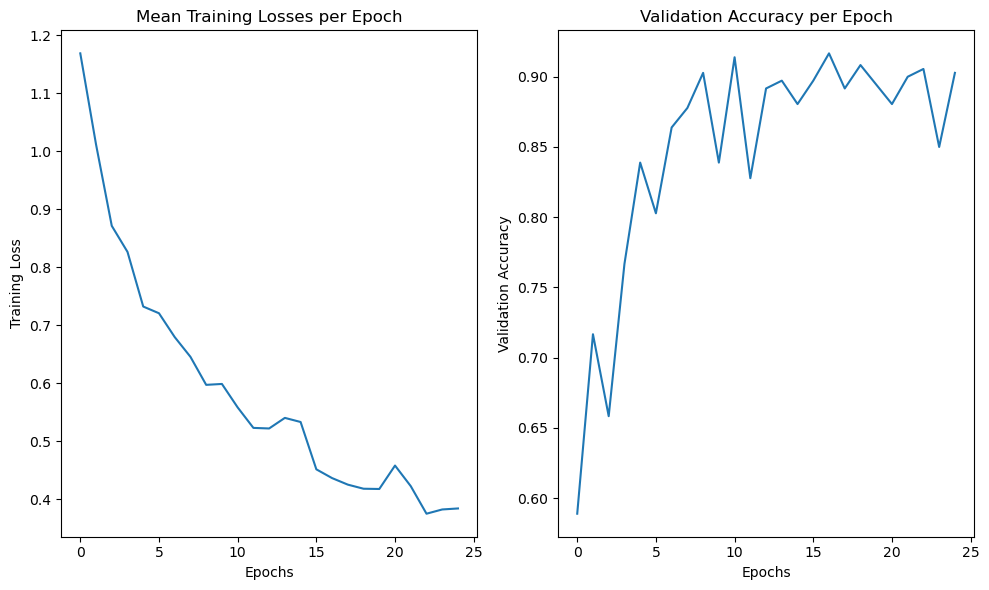

In [84]:
#plot the mean training loss for each epoch
plt.rcParams['figure.figsize'] = (10,6)
plt.subplot(121)
plt.plot(np.arange(num_epochs), total_loss)
plt.title('Mean Training Losses per Epoch')
plt.ylabel('Training Loss')
plt.xlabel('Epochs')

#plot the validation accuracy for each Epoch
plt.subplot(122)
plt.title('Validation Accuracy per Epoch')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.plot(np.arange(num_epochs), total_acc)

plt.tight_layout()
plt.show()

### CNN on Fashion Dataset

In [96]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

val_size = int(0.2*len(training_data))
train_size = len(training_data) - val_size

# Split the dataset into training and validation sets
train_data, val_data = random_split(training_data, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [97]:
model_fashion = CNN().to(device)

In [ ]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

#define objective function and optimizer
objective = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

#define a loop object to keep track of training
loop = tqdm(total=len(train_loader), position=0)
num_epochs = 25

#initialize training mode for CNN
model.train()
total_loss = []
total_acc = []

#complete 10 epochs
for epoch in range(num_epochs):
    loss_list = []

    #train on each x,y pair in the training data
    for batch, (x, y_truth) in enumerate(train_loader):
        # Move to the GPU
        x, y_truth = x.to(device).float(), y_truth.to(device)
        optimizer.zero_grad()
        y_hat = model_fashion(x)
        #compute the loss
        loss = objective(y_hat, y_truth)
        loop.set_description('epoch:{}, loss:{:.4f}'.format(epoch,loss.item()))
        loss_list.append(loss.item())
        loop.update()

        #back propagate and update the weights
        loss.backward()
        optimizer.step()

    #calculate average loss for that epoch
    loss_mean = np.mean(loss_list)

    #set to validation
    model.eval()
    validation_score = 0

    #compute validation accuracy for each epoch
    for x, y_truth in val_loader:
        x, y_truth = x.to(device).float(), y_truth.to(device)
        y_hat = model_fashion(x)
        
        # Get the predicted class
        predicted_labels = y_hat.argmax(dim=1)

        # Compare predictions with true labels
        correct_predictions = (predicted_labels == y_truth).sum().item()

        # Accumulate the number of correct predictions
        validation_score += correct_predictions

    validation_accuracy = validation_score / len(val_loader)
    total_loss.append(loss_mean)
    total_acc.append(validation_accuracy)

loop.close()

epoch:4, loss:2.3021: : 140it [00:01, 109.77it/s]                               

In [103]:
model.eval() # switch to evaluation mode
test_score = 0

#compute the test accuracy
for x, y_truth in test_loader:
    x, y_truth = x.to(device).float(), y_truth.to(device)
    y_hat = model(x)

    # Get the predicted class
    predicted_labels = y_hat.argmax(dim=1)

    # Compare predictions with true labels
    correct_predictions = (predicted_labels == y_truth).sum().item()
    
    test_score += correct_predictions
    
test_accuracy = test_score / len(test_loader)
print(f'Test Accuracy of CNN: {test_accuracy}')

Test Accuracy of CNN: 0.9083333333333333


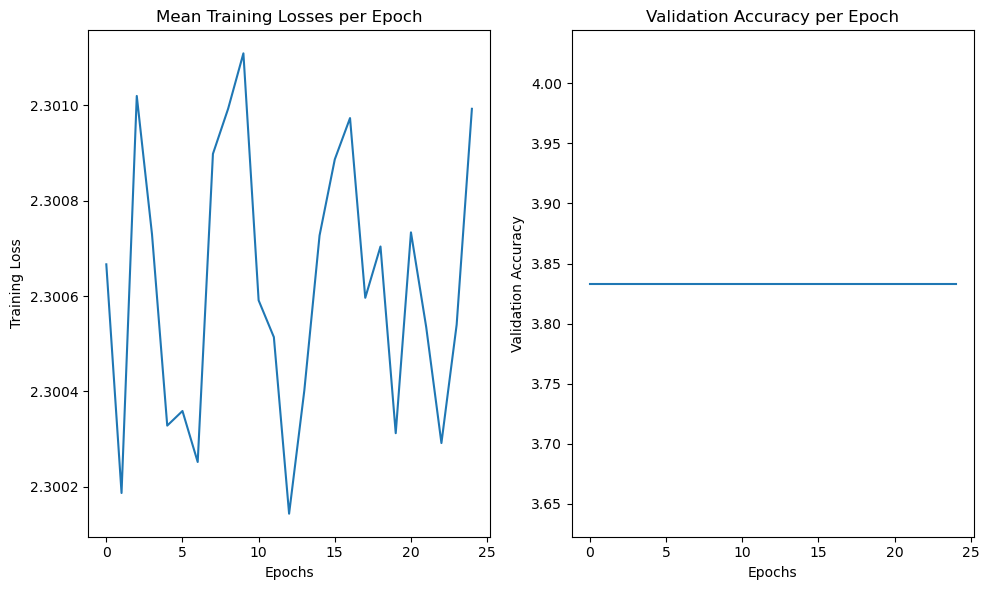

In [104]:
#plot the mean training loss for each epoch
plt.rcParams['figure.figsize'] = (10,6)
plt.subplot(121)
plt.plot(np.arange(num_epochs), total_loss)
plt.title('Mean Training Losses per Epoch')
plt.ylabel('Training Loss')
plt.xlabel('Epochs')

#plot the validation accuracy for each Epoch
plt.subplot(122)
plt.title('Validation Accuracy per Epoch')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.plot(np.arange(num_epochs), total_acc)

plt.tight_layout()
plt.show()